In [1]:
# Install dependencies
!uv pip install matplotlib

Audited 1 package in 1ms


In [2]:
# Parse a fit file
from power_metrics_lib.file_parsers import parse_activity_file
from power_metrics_lib.models import Activity

activity: Activity = parse_activity_file("../tests/files/file.fit")

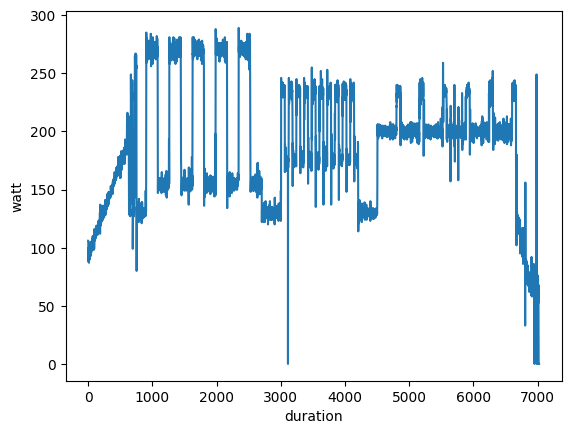

In [3]:
# Plot the power data
import matplotlib.pyplot as plt

plt.plot(activity.power)
plt.ylabel("watt")
plt.xlabel("duration")
plt.show()

In [4]:
# Calculate some initial metrics:
import power_metrics_lib.calculate_metrics as pm

np = pm.calculate_normalized_power(activity.power)
ap = pm.calculate_average_power(activity.power)
print(f"normalized power (np): {np}")
print(f"average power (ap): {ap}")

normalized power (np): 204.0
average power (ap): 187.02520290474158


In [5]:
# Based on np, we can calculate the intensity_factor given your ftp:
ftp = 236
intensity_factor = pm.calculate_intensity_factor(np, ftp)
print(f"intensity_factor: {intensity_factor}")

intensity_factor: 0.864406779661017


In [6]:
# More metrics:
duration = pm.calculate_duration(activity.timestamps)
tss = pm.calculate_training_stress_score(
    normalized_power=np,
    ftp=ftp,
    duration=duration["seconds"],
    intensity_factor=intensity_factor,
)
print(
    f"duration:\n \tin seconds: {duration['seconds']}\n\tin hhmmss: {duration['hh:mm:ss']}"
)
print(f"total stress score: {tss}")

duration:
 	in seconds: 7023
	in hhmmss: 1:57:03
total stress score: 145.76608733122666


In [7]:
# Total work and max power:
total_work = pm.calculate_total_work(activity.power)
max_power = pm.calculate_max_power(activity.power)
print(f"total work: {total_work}")

print(f"max power: {max_power}")

total work: 1313478
max power: 289


In [8]:
# Parse workout file:
from power_metrics_lib.file_parsers import parse_workout_file
from power_metrics_lib.models import Workout

workout: Workout = parse_workout_file("../tests/files/zwift_workout.zwo")
print(workout)

Workout(blocks=[Warmup(duration=600, start_power=0.25, end_power=0.75), SteadyState(duration=600, power=0.75), SteadyState(duration=750, power=0.5), Interval(duration=450, repeat=3, work_power=1.5, work_duration=30, rest_power=0.5, rest_duration=120), SteadyState(duration=180, power=0.75), SteadyState(duration=300, power=1.0), SteadyState(duration=180, power=0.75), Ramp(duration=300, start_power=0.75, end_power=1.0), FreeRide(duration=600), Cooldown(duration=540, start_power=0.75, end_power=0.25)])


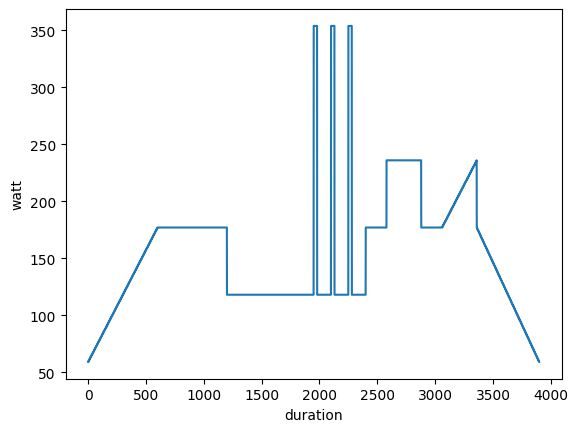

In [11]:
# Create activity from workout:
from power_metrics_lib.transformers import transform_workout_to_activity

workout_activity: Activity = transform_workout_to_activity(workout, ftp)

plt.plot(workout_activity.power)
plt.ylabel("watt")
plt.xlabel("duration")
plt.show()